# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров? (7 параметров - все w и все b)

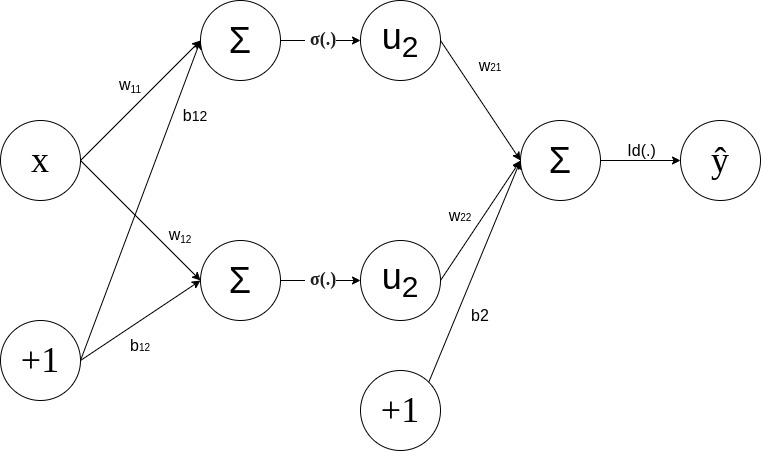

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$\newcommand{\d}{\partial}$
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; \frac{\d \text{L}}{\d \widehat{y}(X_i)} = \; \frac{2}{n}(\widehat{y}(X_i) - Y_i \big).$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; \frac{\d (\sum_{h=1}^2 w_{2h}u_h(X_i) + b_2)}{\d w_{2h}} =  u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; \frac{\d (\sum_{h=1}^2 w_{2h}u_h(X_i) + b_2)}{\d b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; \frac{\d (\sum_{h=1}^2 w_{2h}u_h(X_i) + b_2)}{\d u_h(X_i)} =  w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\d \widehat{y}(X_i)} \frac{\d\widehat{y}(X_i)}{\partial w_{2h}} = \frac{2}{n}\sum_{i=1}^n(\widehat{y}(X_i) - Y_i \big) u_h(X_i)$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial  \widehat{y}(X_i)} \frac{\partial  \widehat{y}(X_i)}{\partial b_2} = \frac{2}{n}\sum_{i=1}^n (\widehat{y}(X_i) - Y_i \big)$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h} = \frac{2w_{2h}}{n}\sum_{i=1}^n(\widehat{y}(X_i) - Y_i \big)$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; \frac{-1}{(1 + exp(-1))^2} \frac{\d}{\d x}e^{-x} = \frac{exp(-x)}{(1 + exp(-x))^2} = \sigma^2(x)(\frac1{\sigma(x)} - 1) = \sigma(x) - \sigma^2(x)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; \frac{\d u_{h}(X_i)}{\d(w_{1h}X_i + b_{1h})}\frac{\d (w_{1h}X_i + b_{1h})}{\d w_{1h}} = \frac{exp(-(w_{1h}X_i + b_{1h}))}{(1 + exp(-(w_{1h}X_i + b_{1h})))^2}X_i = X_i(\sigma(w_{1h}X_i + b_{1h}) - \sigma^2(w_{1h}X_i + b_{1h}))$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; \frac{\d u_{h}(X_i)}{\d(w_{1h}X_i + b_{1h})}\frac{\d (w_{1h}X_i + b_{1h})}{\d b_{1h}} = \frac{exp(-(w_{1h}X_i + b_{1h}))}{(1 + exp(-(w_{1h}X_i + b_{1h})))^2} = \sigma(w_{1h}X_i + b_{1h}) - \sigma^2(w_{1h}X_i + b_{1h})$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Нужно в формулах изменения параметра писать вместо n - размер всей быборки, а случаные K из них (случайные всмысле выбора с возвращением), где K - например 1000 (от задачи зависит). И нужно не забыть отнормировать в $\frac{n}{K}$

**Вывод:**
1) Производные можно считать послойно и использовать посчитанные результаты.  
2) При больших выборках действовать можно как в SGD(считать сумму не по всем элементам и нормировать)  

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def MSE(y_true, y_pred):
    return ((y_true - y_pred)**2).sum(axis = 0)

class Model:

    def __init__(self, batch_size = 100, eta = 0.05, limit = 3000000):
        
        self.batch_size = batch_size
        self.W = np.array([[0.0, 0.0], [0.0, 0.0]])
        self.b1 = np.array([1.0, 1.0])
        self.b2 = np.ones(1)
        self.sigmoid = sigmoid
        self.sample_size = int(1e6)
        self.eta = eta
        self.limit = limit
        
    def fit(self, train, ans):
        grid = np.linspace(0, train.shape[0]-1, train.shape[0], dtype=int)
        batch_idxs = np.random.choice(grid, size = self.batch_size)
        X = train[batch_idxs]
        Y = ans[batch_idxs]
        n = X.shape[0]
        cnt = 0
        while(cnt < self.limit):
            cnt+=1   
            
            layer_out = self.sigmoid(self.W[0]*X + self.b1)
        
            result = (layer_out*self.W[1]).sum(axis = 1) + self.b2
        
            der_MSE_y = (2 / n)*(result - Y)
        
            der_yw2 = layer_out
            der_yb2 = np.ones(1)
            der_yu = np.ones((n, 2)) * self.W[1]
        
            der_MSE_w2 = (der_MSE_y.reshape(n, 1) * layer_out).sum(axis = 0)
            der_MSE_b2 = (der_MSE_y.reshape(n, 1) * der_yb2).sum(axis = 0)
        
            der_MSE_u = (der_MSE_y.reshape(n, 1) * self.W[1]).sum(axis = 0)
        
            self.W[1] -= self.eta * der_MSE_w2;
            self.b2 -= self.eta * der_MSE_b2;
            
            der_u_w1 = X * (layer_out - layer_out*layer_out)
            der_u_b1 = (layer_out - layer_out*layer_out)
        
            der_MSE_w1 = (der_MSE_u * der_u_w1).sum(axis = 0)
            der_MSE_b1 = (der_MSE_u * der_u_b1).sum(axis = 0)
       
            self.W[0] -= self.eta*der_MSE_w1
            self.b1 -= self.eta *der_MSE_b1
        
            batch_idxs = np.random.choice(grid, size = self.batch_size)
            X = train[batch_idxs]
            Y = ans[batch_idxs]
        return self
    
    
    def predict(self, X):
        if (X.shape == (1,)):
            X = X.reshape((1,1))
        layer_out = self.sigmoid(self.W[0]*X + self.b1)
        result = (layer_out*self.W[1]).sum(axis = 1) + self.b2
        return result
    

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [4]:
def sign(X):
    return X / np.abs(X)
def f(X):
    return sign(X)*np.sqrt(np.abs(X)) + 1

sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
X = X.reshape((X.shape[0], 1))
sample_size = X.shape[0]
y = f(X).reshape((int(sample_size), ))


assert y.shape == (sample_size,)

In [5]:
def show_predictions(X, y, y_pred, title = ""):
    plt.figure(figsize=(16, 14))
    plt.scatter(X, y, alpha=0.75, s = 15, label = "answer")
    plt.scatter(X, y_pred, alpha=0.75, color='orange', s = 15, linewidth=1, label = "predictions")
    plt.xlabel('аргумент', fontsize = 20)
    plt.ylabel('Значение', fontsize = 20)
    if (title == ""):
        plt.title('Сравнение предсказаний модели и истиных значений', fontsize = 16)
    else:
        plt.title(title, fontsize = 16)
    plt.legend(fontsize = 20)
    plt.show()

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
model = Model(100, 0.001)
model.fit(X, y)

lin_model = LinearRegression(fit_intercept=True)  # объявляем модель
lin_model.fit(X, y)  # обучаем

LinearRegression()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

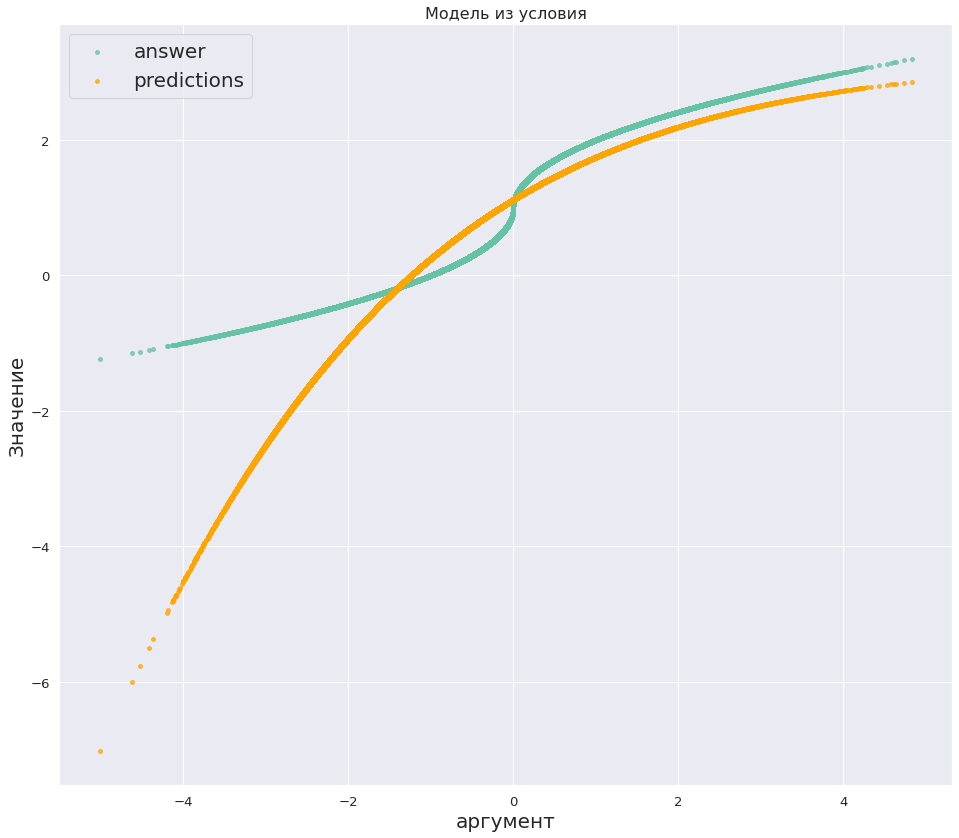

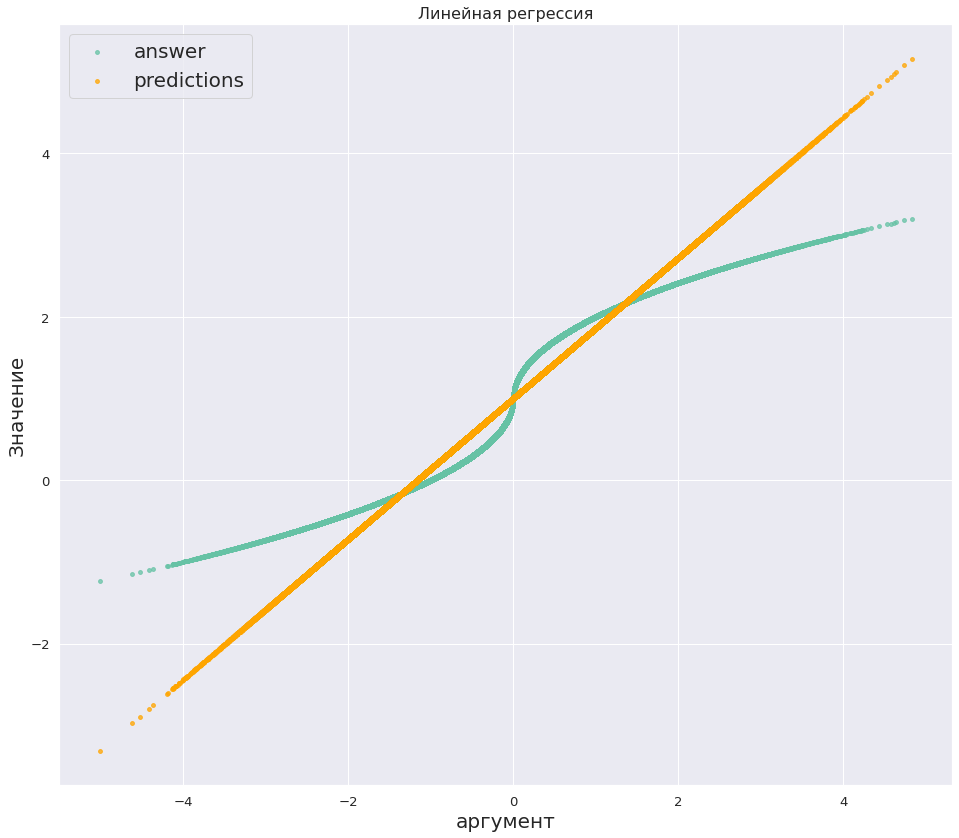

In [8]:
y_pred = model.predict(X)
show_predictions(X, y, y_pred, title = "Модель из условия")
show_predictions(X, y, lin_model.predict(X), title = "Линейная регрессия")

In [9]:
test_sample_size = int(1e5)
X = sps.norm.rvs(size=(test_sample_size, 1))
X = X.reshape((X.shape[0], 1))
y = f(X).reshape((int(test_sample_size), ))

print(f"my model MSE: {round(MSE(y, model.predict(X)), 0)}")
print(f"lin regression MSE: {round(MSE(y, lin_model.predict(X)), 0)}")

my model MSE: 10692.0
lin regression MSE: 5817.0


Краткие выводы:
- модель смогла хорошо подстроиться к одной из ветвей но плохо ко второй   
- модель хорошо подстроилась в окрестности нуля   
- MSE на линейной регрессии гораздо лучше чем у модели  
- можно зметить, что в окрестности нуля график линии у регрессии похож на график модели, что в силу выбранной нами модели, может сведетельствовать о том, что модель действительно нашла оптимальную функцию (по крайней мере около 0)

Повторите вычисления для другой нелинейной функции $y(x)$.

In [10]:
def f(X):
    return (X**3)/10
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
X = X.reshape((X.shape[0], 1))
sample_size = X.shape[0]
y = f(X).reshape((int(sample_size), ))


In [11]:
model = Model(100, 0.05, limit = 1000000)
model.fit(X, y)

lin_model = LinearRegression(fit_intercept=True)  # объявляем модель
lin_model.fit(X, y)  # обучаем

LinearRegression()

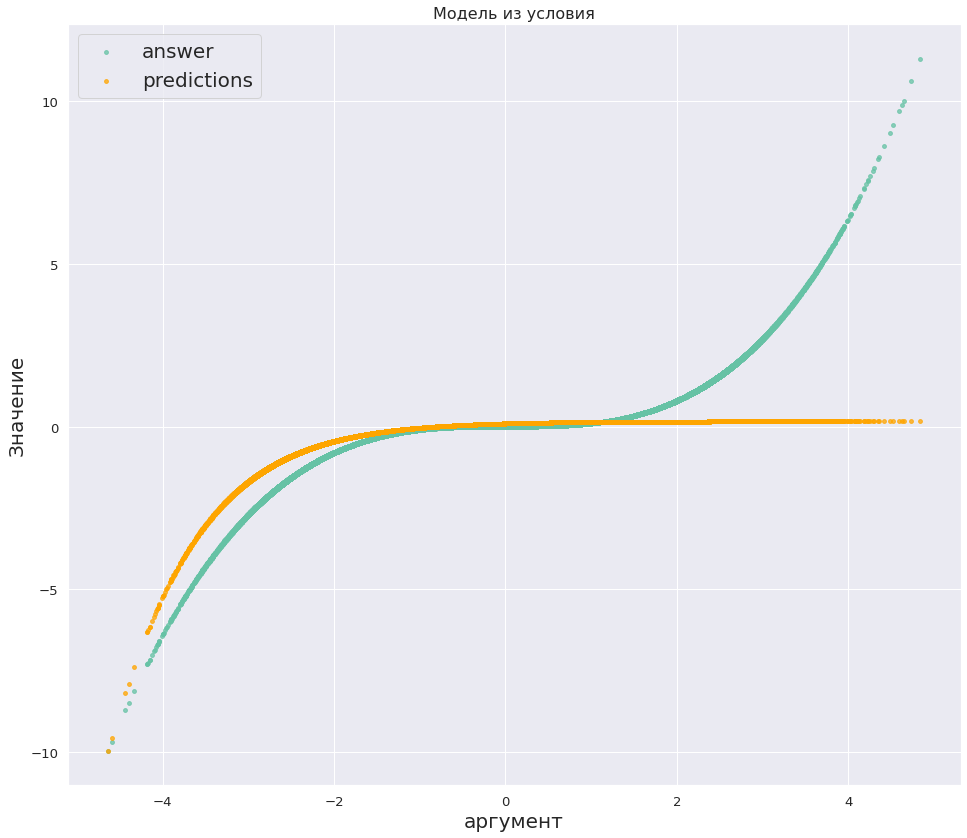

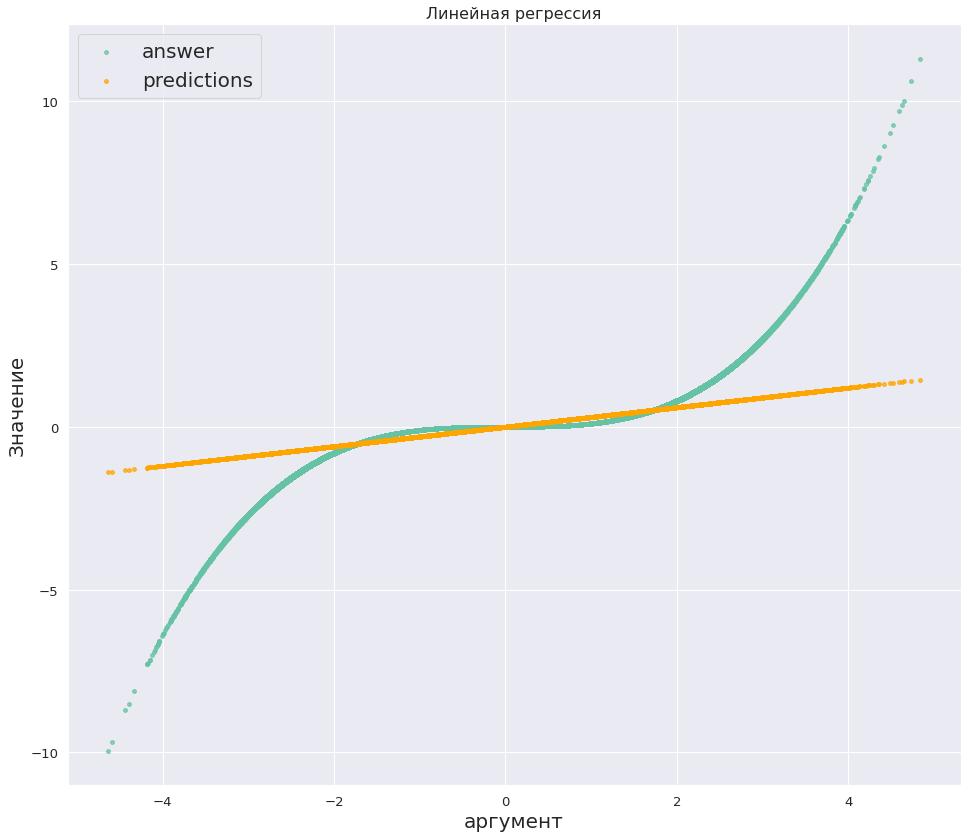

In [12]:
y_pred = model.predict(X)
show_predictions(X, y, y_pred, title = "Модель из условия")
show_predictions(X, y, lin_model.predict(X), title = "Линейная регрессия")

In [13]:
test_sample_size = int(1e5)
X = sps.norm.rvs(size=(test_sample_size, 1))
X = X.reshape((X.shape[0], 1))
y = f(X).reshape((int(test_sample_size), ))

print(f"my model MSE: {round(MSE(y, model.predict(X)), 0)}")
print(f"lin regression MSE: {round(MSE(y, lin_model.predict(X)), 0)}")

my model MSE: 7109.0
lin regression MSE: 5800.0


##### Кракие выводы:
- модель хорошо подстроилась под одну из ветвей  
- модель хорошо подстроилась в окрестности нуля  
- модель плохо подстроилась под 2ую ветвь кубической параболы  
- MSE у линейной регрессии лучше, чем у модели  
- как и в прошлый раз графики в окрестности нуля очень похожи, что также указывает на выдвинутую гипотезу   

**Вывод:**
- модель эффективно оценивает функцию если ей хватает итераций и элементов в выборке   
- модель плохо подстраивается к функции, у которой меняется вторая производная (выпуклость еняется)   
- на той части где выпукласть не меняется или меняется слабо результат очень хороший  

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

**Вывод:**
...